Importing the libraries and datasets

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

Preprocessing:

In [4]:
df.drop('patientid', axis=1, inplace=True)

In [5]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

In [6]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


Understanding The Data

In [7]:
df['age'].mean()

49.242

In [8]:
# The most minimum age of the patients
df['age'].min()

20

In [9]:
# The most maximum age of the patients
df['age'].max()

80

[Text(0, 0, '235'), Text(0, 0, '765')]

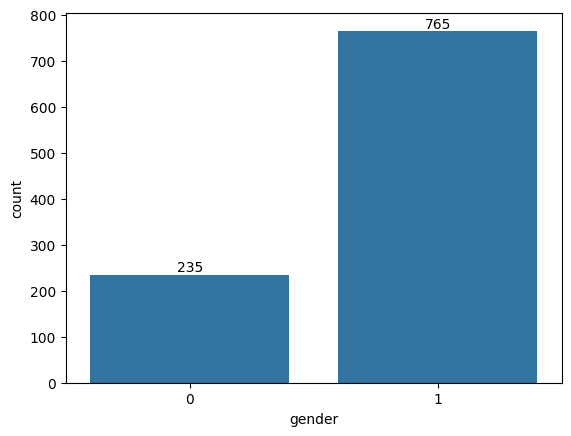

In [10]:
# how many male and female patients in the dataset
import seaborn as sns
ax = sns.countplot(data=df, x='gender')
ax.bar_label(ax.containers[0])

[Text(0, 0, '420'), Text(0, 0, '224'), Text(0, 0, '312'), Text(0, 0, '44')]

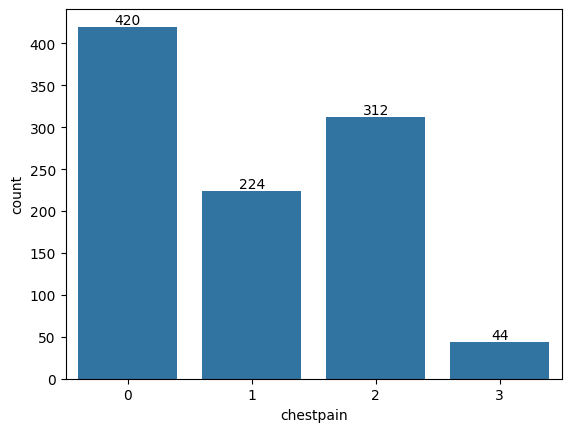

In [11]:
# 3.What is the distribution of chest pain types in the dataset?
ax = sns.countplot(data=df, x='chestpain')
ax.bar_label(ax.containers[0])

[Text(0, 0, '704'), Text(0, 0, '296')]

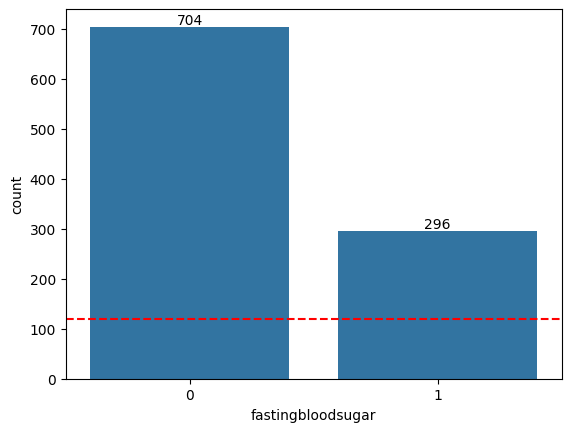

In [12]:
# how many patients is fasting blood sugar > 120 mg/dl

ax = sns.countplot(data=df, x='fastingbloodsugar')
ax.axhline(y=120, linestyle='--', color='red')
ax.bar_label(ax.containers[0])

<Axes: xlabel='age', ylabel='maxheartrate'>

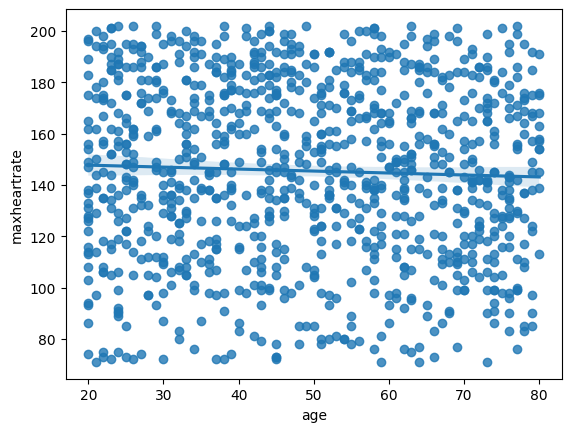

In [13]:
# checking correlation between the age and maximum heart rate

sns.regplot(data=df, x='age', y='maxheartrate')



<Axes: xlabel='target', ylabel='restingBP'>

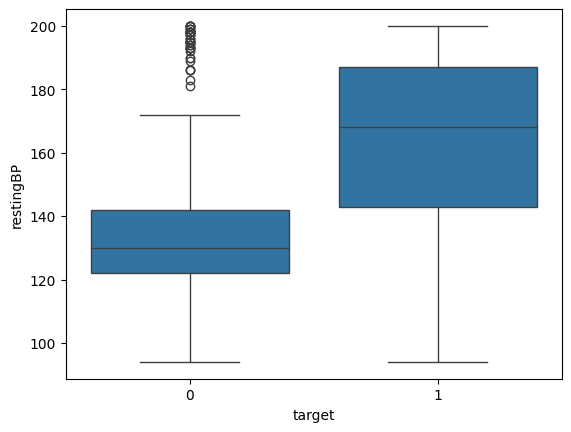

In [14]:
# 6.Visualize the distribution of resting blood pressure for patients with and without heart disease.
sns.boxplot(data=df, x='target', y='restingBP')

<Axes: xlabel='serumcholestrol', ylabel='noofmajorvessels'>

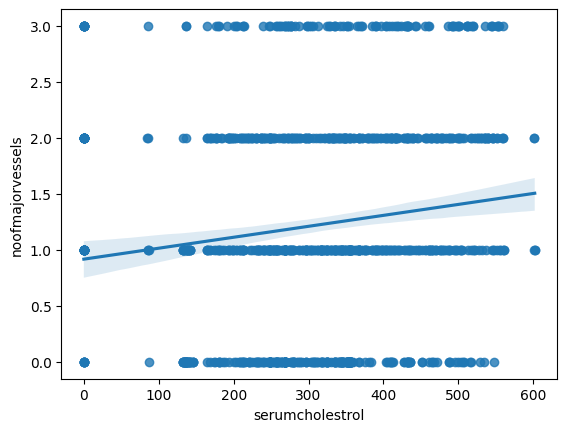

In [15]:
# showing the relation ship between serum cholerstrol and number of major vessels

sns.regplot(data=df, x='serumcholestrol', y='noofmajorvessels')

<Axes: xlabel='chestpain', ylabel='maxheartrate'>

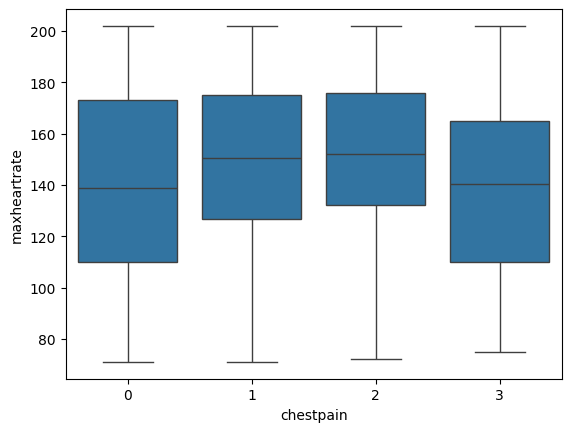

In [16]:
# # 8.Is there a significant difference in maximum heart rates between different chest pain types?
sns.boxplot(data=df, x='chestpain', y='maxheartrate')

<Axes: xlabel='age', ylabel='exerciseangia'>

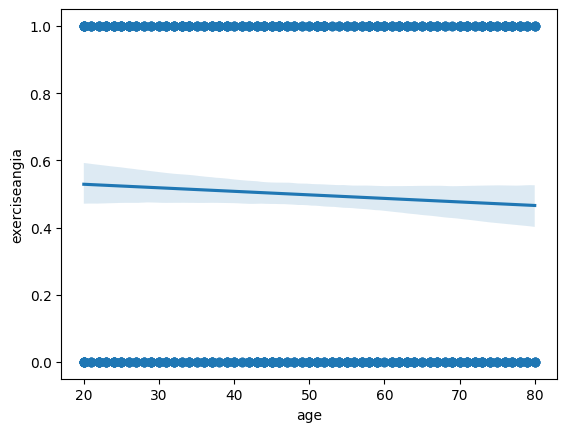

In [17]:
# 9.Investigate the association between age and the presence of exercise-induced angina.
sns.regplot(data=df, x='age', y='exerciseangia')

Text(0, 0.5, 'chestpain')

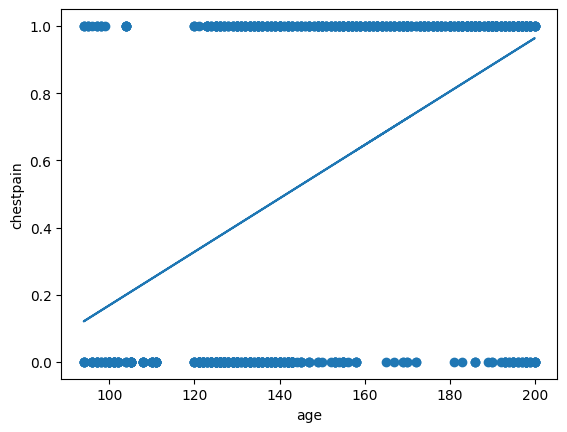

In [18]:
from scipy import stats
import matplotlib.pyplot as plt
XS = df['restingBP']
ys = df['target']


w, b, r, p, std_err = stats.linregress(XS, ys)
def my_func(x):
    return w * x + b

my_model = list(map(my_func, XS))

plt.scatter(XS, ys)
plt.plot(XS, my_model)
plt.xlabel('age')
plt.ylabel('chestpain')

In [19]:
print(p)

2.0694773342876673e-59


In [20]:
df.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


<Axes: >

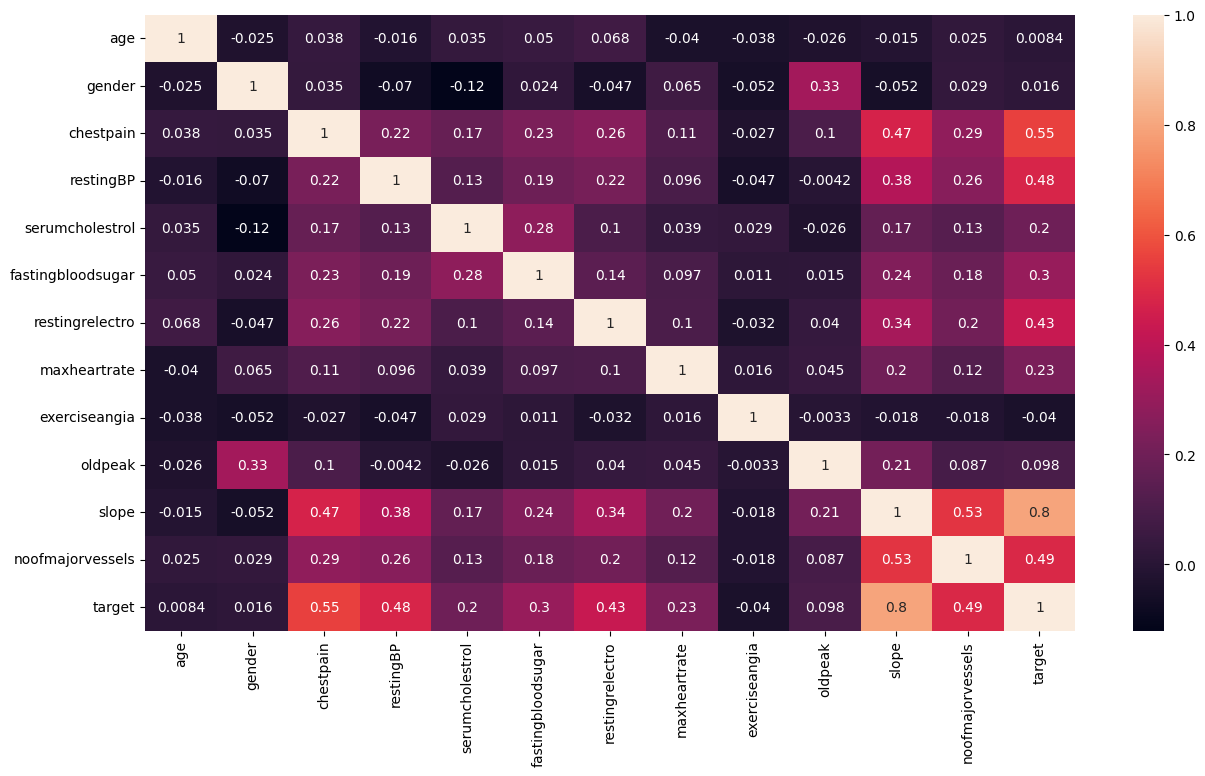

In [21]:
correlation = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True)


Splitting the Data 

In [22]:
X = df.drop('target', axis=1)
y = df['target']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Training the model

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

# predicting the model!!!

y_pred = model.predict(X_test)

# Evaluating The Model!!

mse = mean_squared_error(y_test, y_pred)
accuracy_m = accuracy_score(y_test, y_pred)
print("The error is: ", mse)
print(f"the accuracy is: {accuracy_m}")

The error is:  0.055
the accuracy is: 0.945


c:\Users\Talha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Checking on another algorithm!!

In [26]:
# But Before we Scale The Values!
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [27]:
# Applying the SVM Classifier Algorithm!
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# Let's Predict The model on Test Set!

y_pred = svm_classifier.predict(X_test)


# Then Evaluate The Model!

accuracy = accuracy_score(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)

print(f"The Accuracy is: {accuracy}")
print(f"The mse is: {mse1}")

The Accuracy is: 0.96
The mse is: 0.04


Deploying!!

In [30]:
import joblib
# i Save the Trained SVM model you can use another model from above!
joblib.dump(svm_classifier, 'Cardio_Model.pkl')

['Cardio_Model.pkl']

In [34]:
# Now i Will Create a python script for the deployment
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

# Load the trained model 
svm_model = joblib.load('Cardio_Model.pkl')

@app.route('/classify', methods=['POST'])
def classify():
    # Get data from request
    data = request.json
    
    # Making Prediction!
    prediction = svm_model.predict(data)
    
    # Return Prediction
    return jsonify({'prediction': prediction.tolist()})

if __name__=='__main__':
    app.run(debug=True)
    


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\Talha\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3558: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [36]:
import requests

# Define the URL of the Flask server
url = 'http://127.0.0.1:5000/classify'

# Example input data
data = {
    "age": 50,
    "gender": 1,
    "chestpain": 0,
    "restingBP": 120,
    "serumcholestrol": 200,
    "fastingbloodsugar": 0,
    "restingrelectro": 1,
    "maxheartrate": 150,
    "exerciseangia": 0,
    "oldpeak": 1.5,
    "slope": 1,
    "noofmajorvessels": 0
}

# Send a POST request to the Flask server with the input data
response = requests.post(url, json=data)

# Get the prediction from the response
prediction = response.json()['prediction']

# Print the prediction
print("Predicted target:", prediction)


ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /classify (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000230DF354A90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))